In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [ ]:
data = pd.read_csv("fish_data.csv")

In [ ]:
data.dtypes

,0
species,object
length,float64
weight,float64
w_l_ratio,float64


In [ ]:
print(data.isna().sum()) #Считаем количество NaN значений в датасете
print(data.isnull().sum()) #Считаем количество пропусков в датасете

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64
species      0
length       0
weight       0
w_l_ratio    0
dtype: int64


In [ ]:
#Преобразуем строковые классы в числовые метки
print(list(zip(data['species'].unique(), [i for i in range(len(data['species'].unique()))])))
data['species'].replace(data['species'].unique(), [i for i in range(len(data['species'].unique()))], inplace = True)
print(data.dtypes)
print(data['species'].unique())

[('Anabas testudineus', 0), ('Coilia dussumieri', 1), ('Otolithoides biauritus', 2), ('Otolithoides pama', 3), ('Pethia conchonius', 4), ('Polynemus paradiseus', 5), ('Puntius lateristriga', 6), ('Setipinna taty', 7), ('Sillaginopsis panijus', 8)]
species        int64
length       float64
weight       float64
w_l_ratio    float64
dtype: object
[0 1 2 3 4 5 6 7 8]


<Axes: >

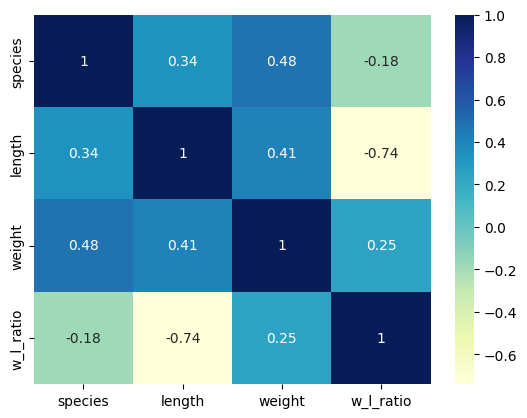

In [ ]:
corr_matrix_pearson = data.select_dtypes(include='number').corr(method = 'pearson').round(2)
sns.heatmap(corr_matrix_pearson, cmap="YlGnBu", annot=True)

<Axes: >

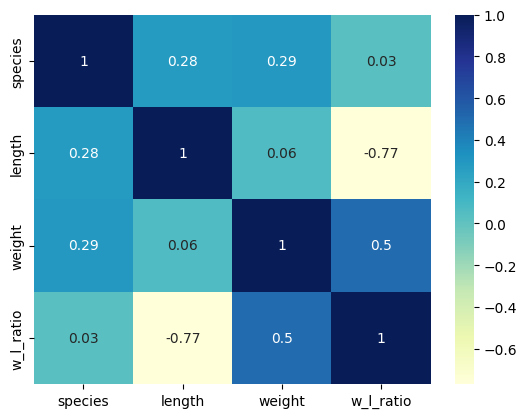

In [ ]:
corr_matrix_spearman = data.select_dtypes(include='number').corr(method = 'spearman').round(2)
sns.heatmap(corr_matrix_spearman, cmap="YlGnBu", annot=True)

In [ ]:
data.iloc[:,range(1,4)] = StandardScaler().fit_transform(data.iloc[:,range(1,4)]) #Стандартизируем фичи

In [ ]:
#Разбиение данных на тестовую и обучающую выборки
x = data.iloc[:,range(1,4)]
y = data.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2024-9-29)

In [ ]:
#Мультиклассовая классификация с использованием логистической регрессии
model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model1.fit(x_train, y_train)
preds1 = model1.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9227941176470589
F1-мера: 0.9222671424170844


Text(0.5, 23.52222222222222, 'Предсказанные классы')

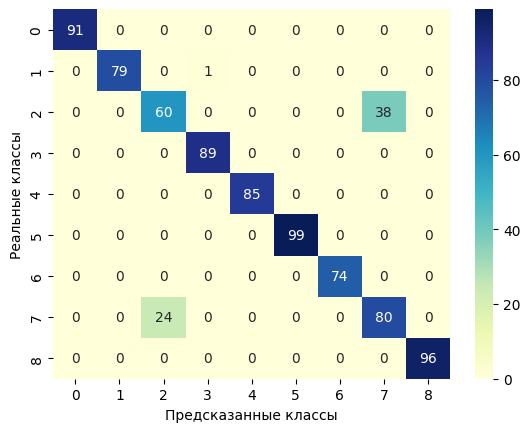

In [ ]:
#Метрики качества полученной модели полиномиальной логистической регрессии
accuracy = accuracy_score(y_test, preds1)
f1 = f1_score(y_test, preds1, average='weighted')
conf_matrix = confusion_matrix(y_test, preds1)
print(f'Accuracy: {accuracy}')
print(f'F1-мера: {f1}')
sns.heatmap(conf_matrix, cmap="YlGnBu", annot=True)
plt.ylabel('Реальные классы')
plt.xlabel('Предсказанные классы')